### Load Library

In [8]:
import wordcloud
import nltk
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
# NLP
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import re

### Load Data

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
print("train shape:",train.shape,"test shape:",test.shape)

train shape: (14869, 2) test shape: (9914, 2)


In [11]:
train.groupby("class").count().style.background_gradient()

,tweet
class,
0,863
1,11491
2,2515


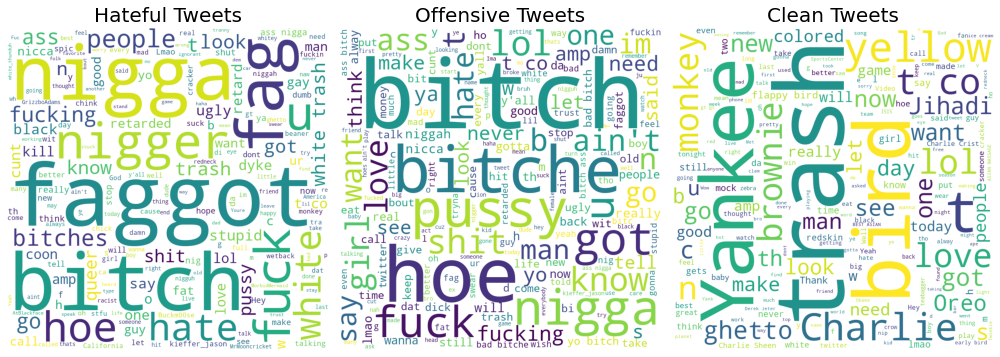

In [14]:
# Plotting wordclouds for the 3 kinds of tweets
stopwords = set(STOPWORDS)

# Removing 'user' word as it does not hold any importance in our context
stopwords.add('user')    
stopwords.add('RT')#retweet
   
hateful_tweets = train['tweet'][train['class']==0].to_string()
wordcloud_hateful = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(hateful_tweets)

offensive_tweets = train['tweet'][train['class']==1].to_string()
wordcloud_offensive = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(offensive_tweets)
clean_tweets = train['tweet'][train['class']==2].to_string()
wordcloud_clean = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(clean_tweets)

 
# Plotting the WordCloud images                     
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_hateful)
plt.axis("off")
plt.title('Hateful Tweets', fontdict={'fontsize': 20})

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_offensive)
plt.axis("off")
plt.title('Offensive Tweets', fontdict={'fontsize': 20})
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_clean)
plt.axis("off")
plt.title('Clean Tweets', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()

In [32]:
# Feature Engineering
train_df_fe = train.copy()
train_df_fe['tweet_length'] = train_df_fe['tweet'].str.len()
train_df_fe['num_hashtags'] = train_df_fe['tweet'].str.count('#')
train_df_fe['num_exclamation_marks'] = train_df_fe['tweet'].str.count('\!')
train_df_fe['num_question_marks'] = train_df_fe['tweet'].str.count('\?')
train_df_fe['total_tags'] = train_df_fe['tweet'].str.count('@')
train_df_fe['num_punctuations'] = train_df_fe['tweet'].str.count('[.,:;]')
train_df_fe['num_question_marks'] = train_df_fe['tweet'].str.count('[*&$%]')
train_df_fe['num_words'] = train_df_fe['tweet'].apply(lambda x: len(x.split()))
# train_df_fe.head()

C:\Users\yuanhsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yuanhsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yuanhsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

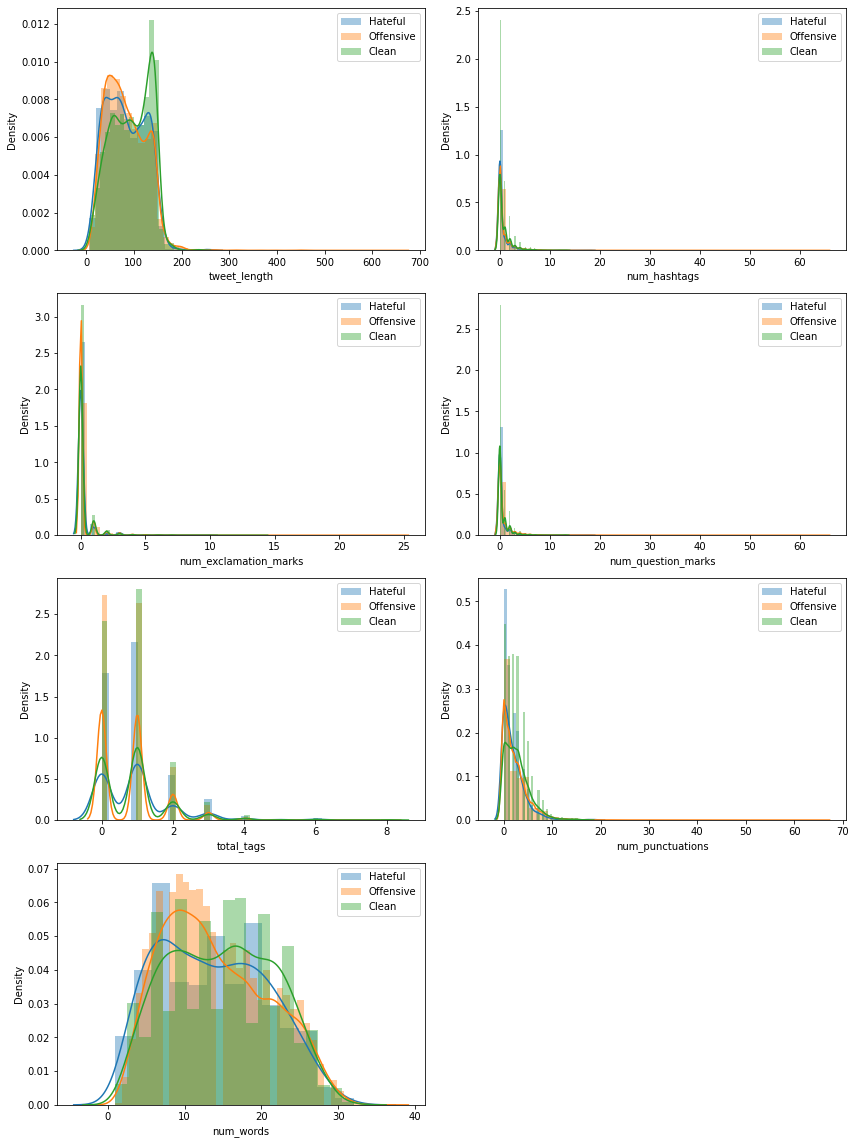

In [36]:
# Visualizing relationship of newly created features with the tweet sentiments
plt.figure(figsize=(12, 16))
features = ['tweet_length', 'num_hashtags', 'num_exclamation_marks', 'num_question_marks', 
            'total_tags', 'num_punctuations', 'num_words']
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.distplot(train_df_fe[train_df_fe['class']==0][features[i]], label = 'Hateful')
    sns.distplot(train_df_fe[train_df_fe['class']==1][features[i]], label = 'Offensive')
    sns.distplot(train_df_fe[train_df_fe['class']==2][features[i]], label = 'Clean')
    plt.legend()
plt.tight_layout()
plt.show()